<center><font size = 8><b> House Price  Prediction</b></font></center></br></br>

# Hossam Tarek Elsayed 


In [1]:
#imports

import numpy  as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

%matplotlib inline

%matplotlib inline

## Data disocvrey 

In [2]:
data = pd.read_csv(r"data/housing.csv")

In [3]:
data.sample(15)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
#dropping the 207 entry missing for the data
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [6]:
x_train.sample(7)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12781,-121.43,38.64,34.0,2010.0,411.0,1501.0,422.0,2.0417,INLAND
776,-122.10,37.64,28.0,1784.0,311.0,735.0,278.0,4.6635,NEAR BAY
9403,-122.53,37.88,25.0,4921.0,866.0,1913.0,834.0,6.8742,NEAR BAY
14525,-117.13,32.92,16.0,2173.0,399.0,1460.0,393.0,4.2614,<1H OCEAN
5297,-118.44,34.07,21.0,730.0,263.0,965.0,224.0,2.0511,<1H OCEAN
3121,-117.74,35.65,15.0,2357.0,484.0,1110.0,442.0,3.1755,INLAND
5504,-118.43,33.99,43.0,2483.0,548.0,1212.0,493.0,4.0189,<1H OCEAN


In [7]:
y_train.sample(7)

10243    270800.0
8402     148500.0
13959    124500.0
17465    268800.0
16035    228600.0
9134     239900.0
14669    124200.0
Name: median_house_value, dtype: float64

In [8]:
train_data=x_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
10685,-117.73,33.63,15.0,2874.0,592.0,1382.0,586.0,5.5137,<1H OCEAN,161800.0
13471,-117.38,34.08,11.0,5684.0,1139.0,3095.0,1036.0,3.6875,INLAND,112600.0
8966,-118.40,34.00,34.0,1816.0,335.0,872.0,339.0,4.8500,<1H OCEAN,329400.0
8499,-118.29,33.89,32.0,2355.0,583.0,1605.0,571.0,4.2171,<1H OCEAN,218200.0
16142,-122.46,37.77,52.0,3193.0,688.0,2099.0,681.0,3.9375,NEAR BAY,402900.0
...,...,...,...,...,...,...,...,...,...,...
16500,-121.04,37.78,32.0,2916.0,528.0,1466.0,473.0,2.5643,INLAND,200000.0
8434,-118.37,33.92,36.0,1075.0,197.0,509.0,197.0,4.9688,<1H OCEAN,238900.0
17075,-122.21,37.48,37.0,1326.0,335.0,1771.0,335.0,3.0147,NEAR BAY,218100.0
18834,-122.61,41.74,15.0,4206.0,922.0,1863.0,869.0,2.0591,INLAND,55700.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

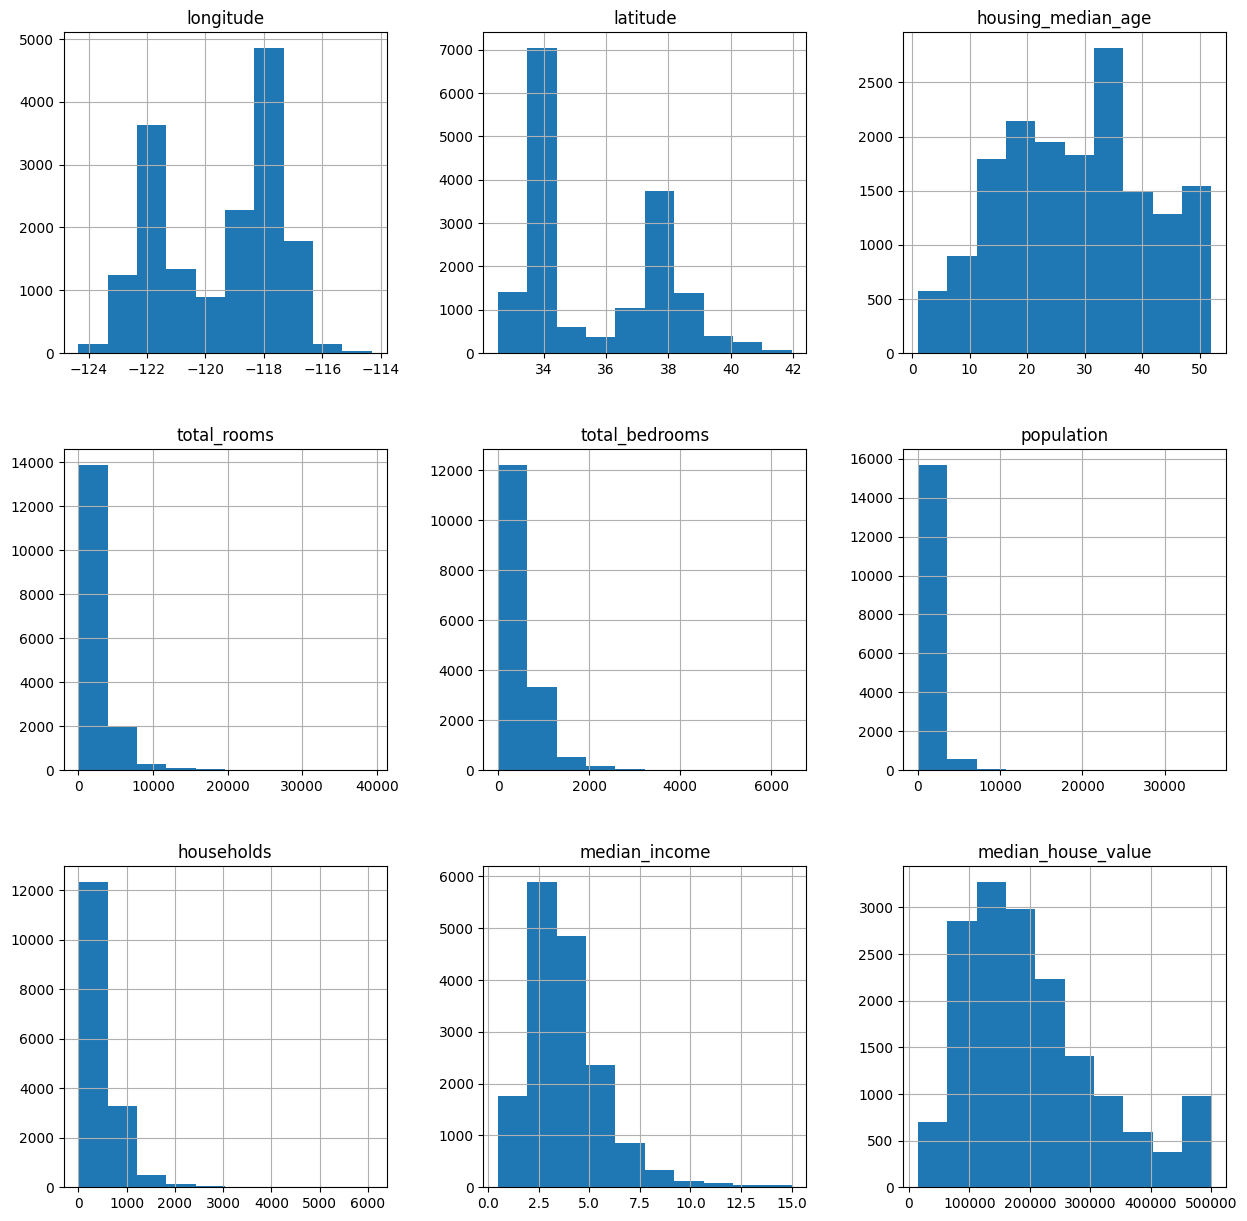

In [9]:
train_data.hist(figsize=(15,15))

<Axes: >

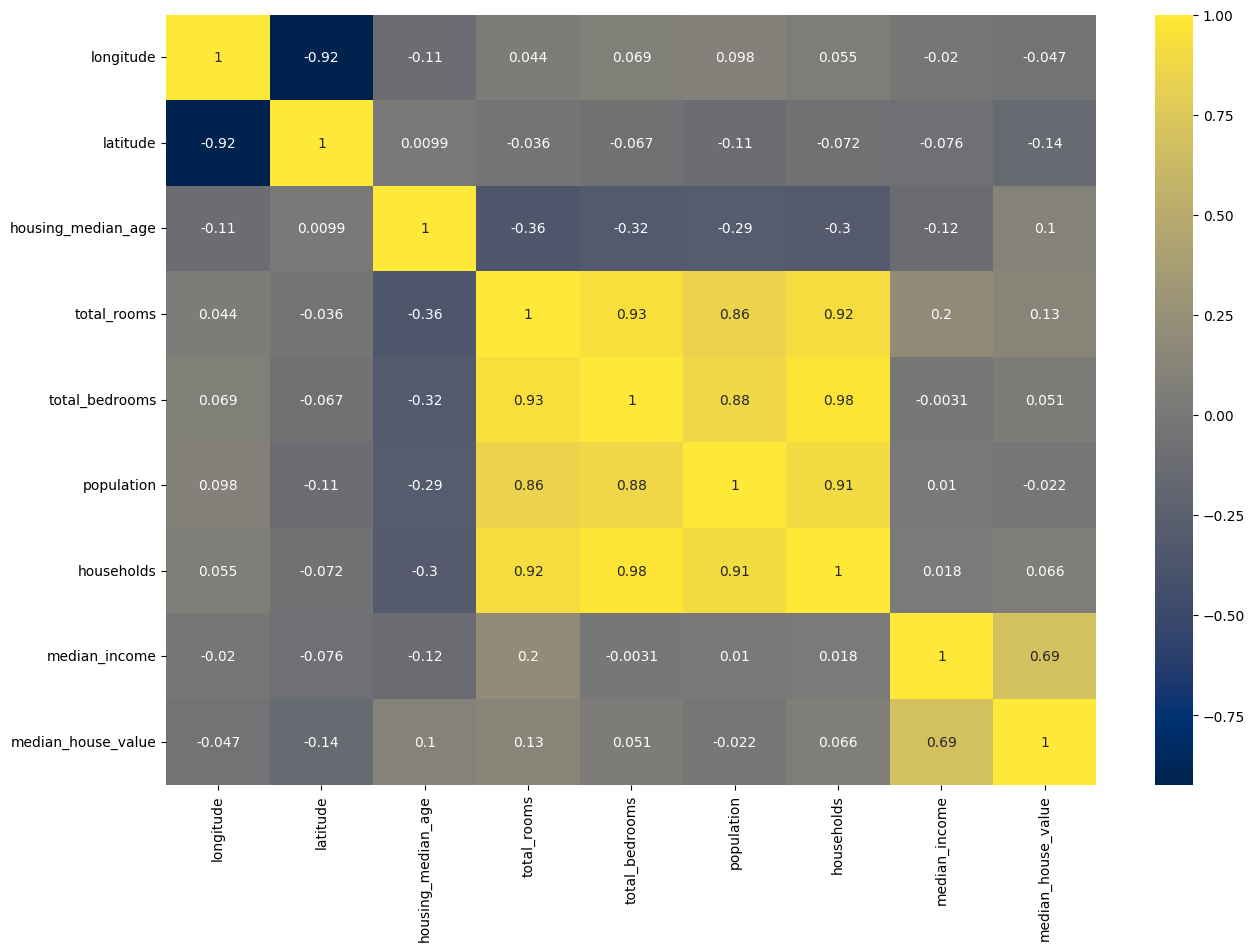

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(train_data.drop(['ocean_proximity'],axis=1).corr(),annot=True,cmap="cividis")


## Data preprocessing 

In [11]:
# we notice that the 5 features ("total rooms","total bedrooms","population","households") 
train_data['households']=np.log(train_data['households']+1)
train_data['population']=np.log(train_data['population']+1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['total_rooms']=np.log(train_data['total_rooms']+1)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

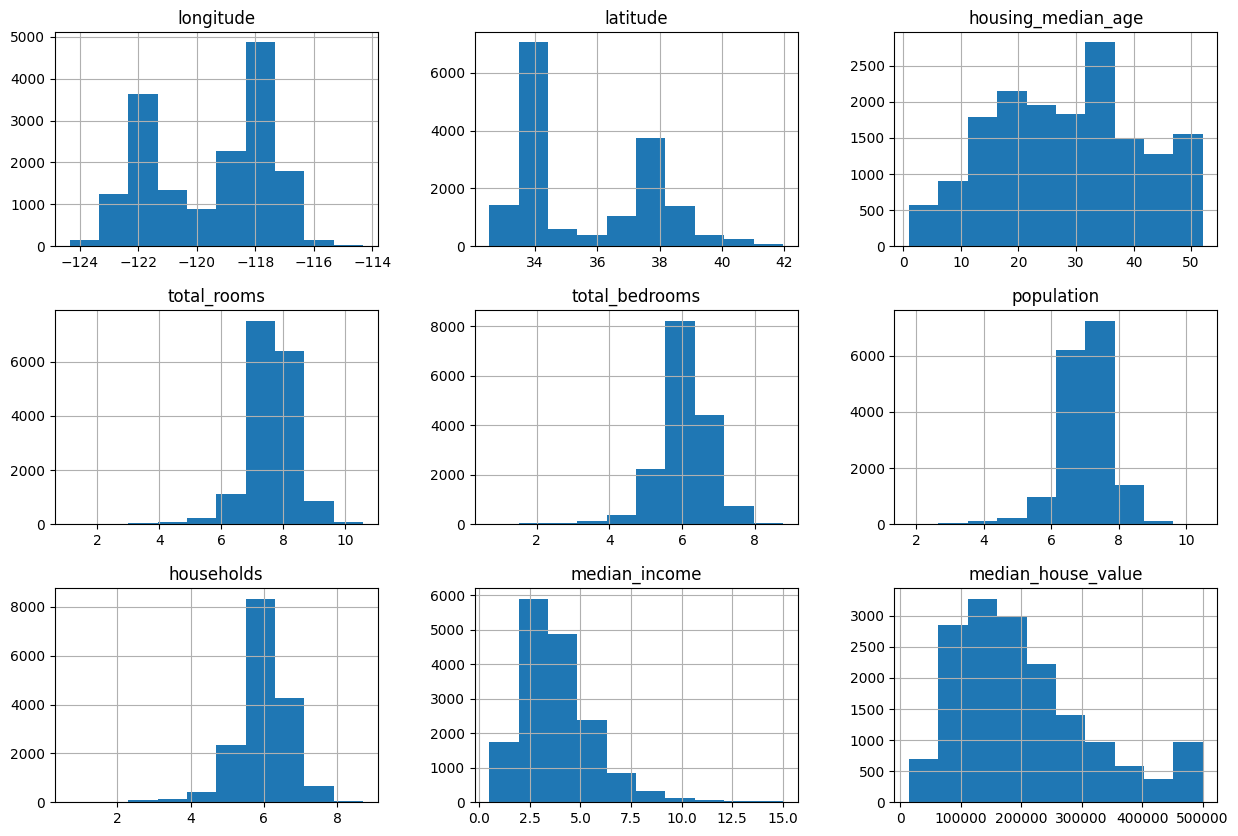

In [12]:
train_data.hist(figsize=(15,10))

In [13]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7160
INLAND        5244
NEAR OCEAN    2106
NEAR BAY      1834
ISLAND           2
Name: count, dtype: int64

In [14]:
# convert ocean proximty feature   
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)


<Axes: >

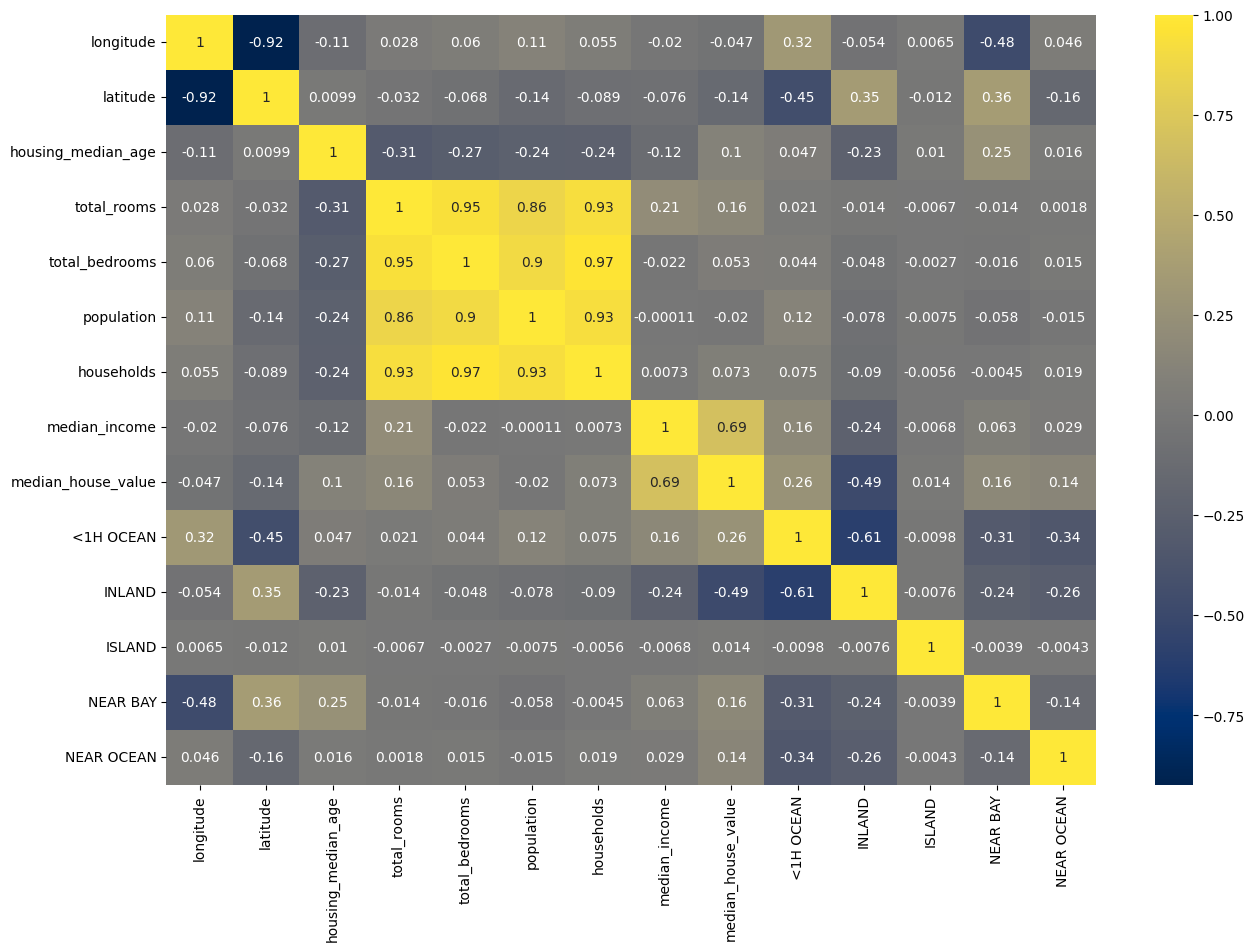

In [15]:
plt.figure(figsize=(15,10))

sns.heatmap(train_data.corr(),annot=True,cmap="cividis")


<Axes: xlabel='latitude', ylabel='longitude'>

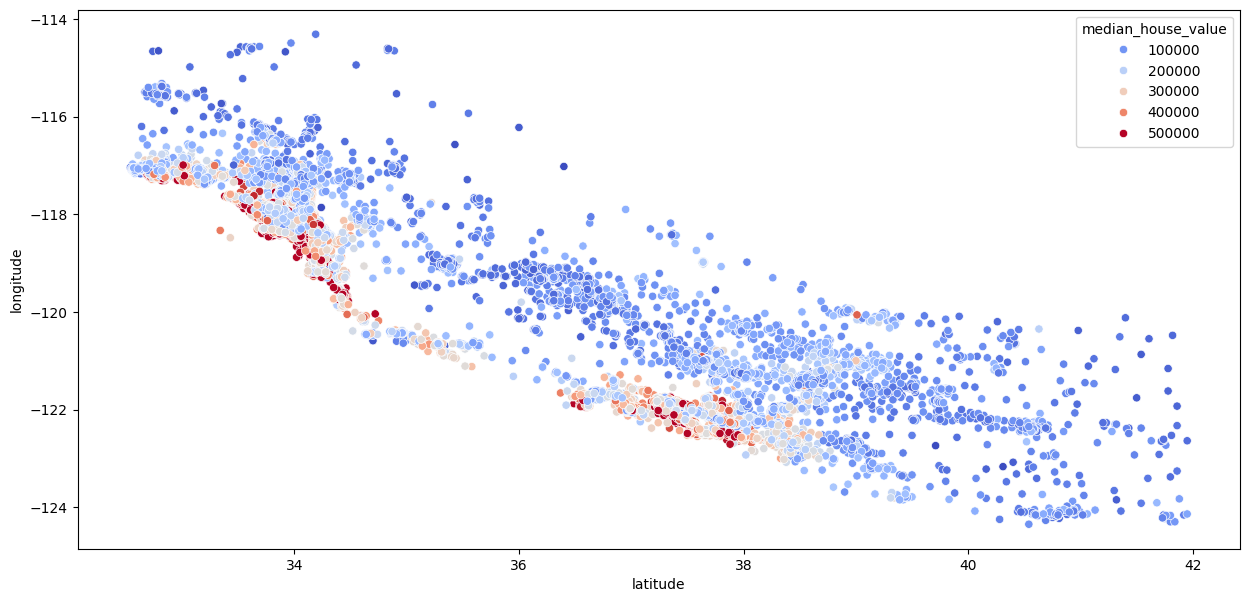

In [16]:
plt.figure(figsize=(15,7))
sns.scatterplot(x="latitude",y="longitude",data=train_data,hue="median_house_value",palette="coolwarm")

## Feature engineering

In [17]:
train_data['bedroom_ratio']=train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms']=train_data['total_rooms'] / train_data['households']

<Axes: >

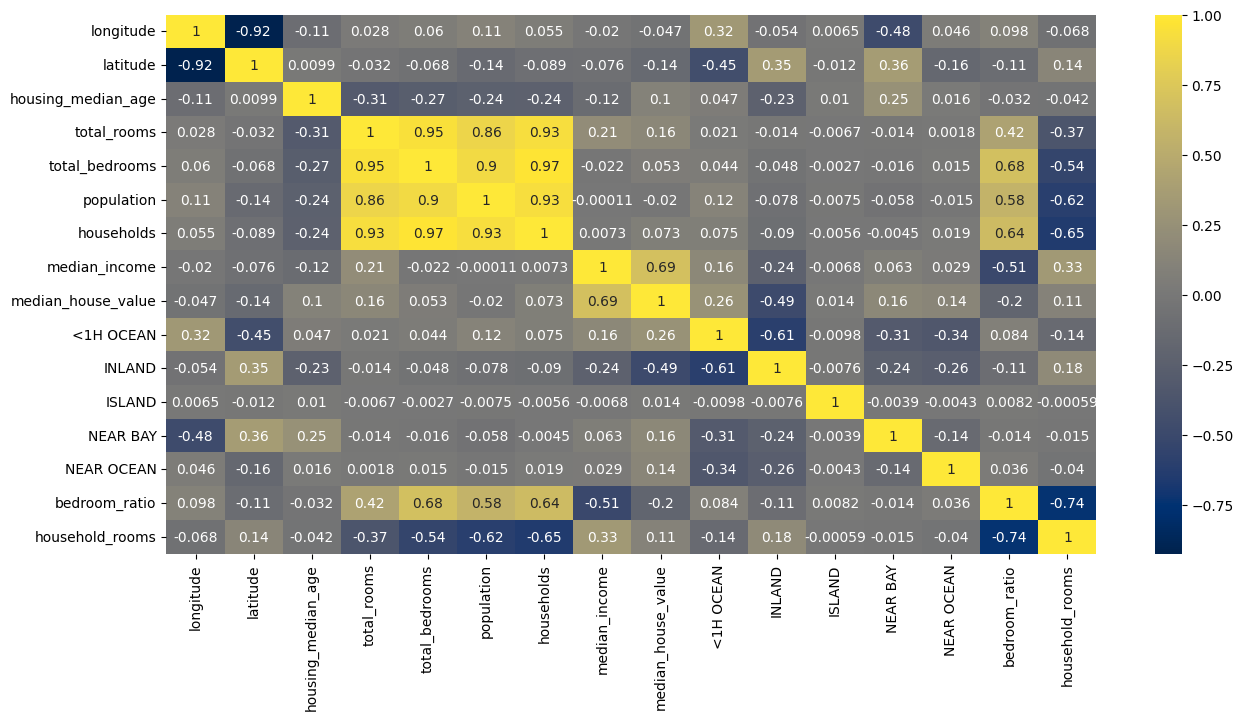

In [18]:
plt.figure(figsize=(15,7))

sns.heatmap(train_data.corr(),annot=True,cmap="cividis")


Splitting the data to train and test

In [ ]:
X=data.drop(['median_house_value'],axis=1)
Y=data['median_house_value']
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8)